<a href="https://colab.research.google.com/github/thangckt/note_ml/blob/main/notebook/2_code_tips/6_fitting_roots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Curve fitting (scipy)
## I.1. Curve fitting with scipy.opmtimize
https://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html

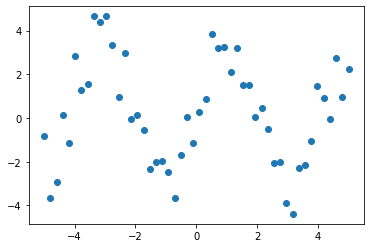

In [ ]:
import numpy as np
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.show()

In [ ]:
# Now fit a simple sine function to the data
from scipy import optimize
def test_func(x, a, b):
    return a * np.sin(b * x)
##-- fitting
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[3.0384518  1.52782469]


In [ ]:
params_covariance

array([[ 0.04632637, -0.00058567],
       [-0.00058567,  0.00057484]])

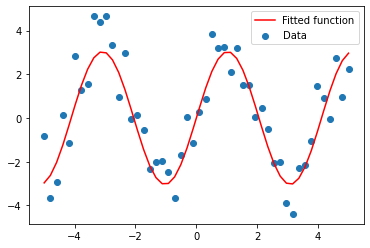

In [ ]:
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),'r', label='Fitted function')

plt.legend(loc='best')
plt.show()

# I.2. Curve fitting with LMFIT
https://lmfit.github.io/lmfit-py/model.html    <br>
The main task is to write an "objective function". The chi-square $(\chi^2)$ statistic is often defined as:
$$ \chi^2 =  \sum_i^{N} \frac{[y^{\rm meas}_i - y_i^{\rm model}({\bf{v}})]^2}{\epsilon_i^2} $$
where $y_i^{\rm meas}$ is the set of measured data, $y_i^{\rm
model}({\bf{v}})$ is the model calculation, $\bf{v}$ is the set of variables in the model to be optimized in the fit, and $\epsilon_i$ is the estimated uncertainty in the data. <br>
In a traditional non-linear fit, one writes an objective function that takes the variable values and calculates the residual array $y^{\rm
meas}_i - y_i^{\rm model}({\bf{v}})$, or the residual array scaled by the data uncertainties, $[y^{\rm meas}_i - y_i^{\rm
model}({\bf{v}})]/{\epsilon_i}$, or some other weighting factor.  <br>
Non-Linear Least-Squares Minimization and Curve-Fitting for Python (LMFIT) is the package provides simple tools to help you build complex fitting models for non-linear least-squares problems. The Model class in lmfit (lmfit.Model) provides a simple and flexible approach to curve-fitting problems.

In [ ]:
## work with lmfit.Model
from lmfit import Model

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))

gmodel = Model(gaussian)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))

parameter names: ['amp', 'cen', 'wid']
independent variables: ['x']


In [ ]:
gmodel.param_names

['amp', 'cen', 'wid']

In [ ]:
import numpy as np

# generate data
mu, sigma = 0, 0.5 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
##--
x = np.arange(1000)
y = s
##-- fitting
result = gmodel.fit(y, x=x, amp=5, cen=0.5, wid=1)
print(result.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 70
    # data points      = 1000
    # variables        = 3
    chi-square         = 250.103847
    reduced chi-square = 0.25085642
    Akaike info crit   = -1379.87906
    Bayesian info crit = -1365.15580
[[Variables]]
    amp: -1.50918372 +/- 87647.1572 (5807587.00%) (init = 5)
    cen:  2.61049184 +/- 5316.96789 (203676.86%) (init = 0.5)
    wid:  0.24714425 +/- 5811.24995 (2351359.56%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  1.000
    C(amp, cen) =  1.000
    C(cen, wid) =  1.000


## analysis reults
https://lmfit.github.io/lmfit-py/fitting.html
When comparing fits with different numbers of varying parameters, one typically selects the model with **lowest** reduced chi-square, Akaike information criterion, and/or Bayesian information criterion. Generally, the Bayesian information criterion is considered the most conservative of these statistics.
https://lmfit.github.io/lmfit-py/model.html#modelresult-methods

In [ ]:
# result.best_fit
result.params

name,value,standard error,relative error,initial value,min,max,vary
amp,-1.50918372,87647.1572,(5807587.00%),5,-inf,inf,True
cen,2.61049184,5316.96789,(203676.86%),0.5,-inf,inf,True
wid,0.24714425,5811.24995,(2351359.56%),1,-inf,inf,True


In [ ]:
result.chisqr

250.10384654228395

In [ ]:
# Goodness-of-Fit Statistics
result.minimize()

## Built-in Fitting Models in the models module: 
https://lmfit.github.io/lmfit-py/builtin_models.html#builtin-models-chapter  <br>
Lmfit provides several built-in fitting models in the models module. These pre-defined models each subclass from the Model class and wrap relatively well-known functional forms, such as Gaussians, Lorentzian, and Exponentials

In [ ]:
from lmfit import models

fun = models.LinearModel()
fun.param_names

['slope', 'intercept']

In [ ]:
fun = models.PolynomialModel(3)
fun.param_names

['c0', 'c1', 'c2', 'c3']

In [ ]:
fun = models.LinearModel()
fun.param_names

NameError: name 'models' is not defined

In [ ]:
fun.guess().__doc__

TypeError: guess() missing 1 required positional argument: 'data'

## USER defined forms

In [ ]:
import sys
sys.path.append("D:/work/Tool_codes/Tools_Python")
import thaTool 
from lmfit import Model

myModel = Model(thaTool.UserModelLmfit.Carreau)
myModel.make_params(A1=-3.3, A2=-2.9, t=2.0, a=2.2, n=0.2)
myModel.param_names

['A1', 'A2', 't', 'a', 'n']

In [ ]:
myModel.init_params

AttributeError: 'Model' object has no attribute 'init_params'

In [ ]:
myModel = Model(thaTool.UserModelLmfit.sum_3unNormalGaussian)
myModel.param_names

['amp1', 'amp2', 'amp3', 'cen1', 'cen2', 'cen3', 'sigma1', 'sigma2', 'sigma3']

Example

In [ ]:
from lmfit import models 
### =============================================================================
### Fitting Thermal Expansion Coeff
### =============================================================================
x1, y1 = df['Temp'], df['LatConst']
yModel = models.PolynomialModel(3)         # PolynomialModel(1)
pars = yModel.guess(y1, x=x1)
yFit = yModel.fit(y1, pars, x=x1)             # yFit.best_fit: yValue   , yFit.best_values: coeff
a0, a1, a2, a3 = yFit.best_values['c0'], yFit.best_values['c1'], yFit.best_values['c2'], yFit.best_values['c3']

# II. Finding Root of a non-linear function
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar

Example: find root of equation: $ \large f(x)=(x^3-1) $

In [ ]:
from scipy import optimize
def f(x):
    return (x**3 - 1)  # only one real root at x = 1

def fprime(x):
    return 3*x**2
##--------
sol = optimize.root_scalar(f, x0=0.2, fprime=fprime, method='newton')

print(sol.root)
print(sol.iterations) 
print(sol.function_calls)

1.0
11
22


# 2. Find intersect of 2 lines of decrete datas (using Shapely)
https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value

https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value/51145981#51145981

https://stackoverflow.com/questions/22417842/how-do-i-find-the-intersection-of-two-line-segments
Using Shapely (https://pypi.python.org/pypi/Shapely) the code can look as simple as this:

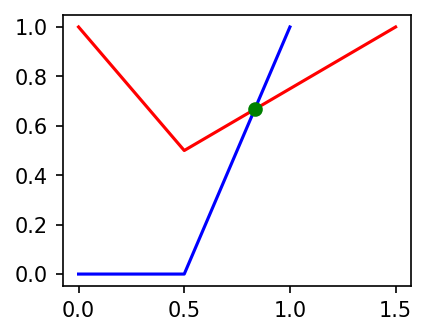

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# dataPoint1 = np.array([[0,0], [0.5,0], [1,1], [1.5,0]])
dataPoint1 = np.array([[0,0], [0.5,0], [1,1]])
dataPoint2 = np.array([[0,1], [0.5,0.5], [1.5,1]])
# find intersect                                              
line1 = LineString(dataPoint1)
line2 = LineString(dataPoint2)

intersectPoint = line1.intersection(line2)
Points = np.array(intersectPoint)                  # Points = np.asarray(intersectPoint).reshape(-1,2)
if Points.ndim==1:                      
    Points = Points.reshape(1,2)

# plot
fig1,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3, 2.4), dpi=150) 

ax1.plot(dataPoint1[:,0], dataPoint1[:,1], 'b-', label='Solid') 
ax1.plot(dataPoint2[:,0], dataPoint2[:,1], 'r-', label='Liquid') 

ax1.plot(Points[:,0], Points[:,1], 'go' ) 
plt.show()

In [ ]:
import shapely.geometry as geom
isinstance(intersectPoint, geom.Point)

True

In [ ]:
## convert POINT type to numpy
# https://gis.stackexchange.com/questions/252764/converting-a-list-of-shapely-geometry-to-numpy-array

for p in intersectPoint:
    print(p)

TypeError: 'Point' object is not iterable

In [ ]:
print(intersectPoint)
print(Points)
print(type(Points))

POINT (0.8333333333333334 0.6666666666666666)
[[0.83333333 0.66666667]]
<class 'numpy.ndarray'>


In [ ]:
print(dataPoint1)
print(type(dataPoint1))

[[0.  0. ]
 [0.5 0. ]
 [1.  1. ]]
<class 'numpy.ndarray'>


In [ ]:
import sys, os
sys.path.append("D:/work/Tool_codes/Tools_Python")
import thaTool 
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# dataPoint1 = np.array([[0,0], [0.5,0], [1,1], [1.5,0]])
dataPoint1 = np.array([[0,0], [0.5,0], [1,1]])
dataPoint2 = np.array([[0,1], [0.5,0.5], [1.5,1]])
# find intersect                                              
line1 = LineString(dataPoint1)
line2 = LineString(dataPoint2)

Points = thaTool.intersectPoint(dataPoint1, dataPoint2)
print(Points)

[[0.83333333 0.66666667]]


False

## Note for MULTILINE of GEOMETRYCOLLECTION type
https://gis.stackexchange.com/questions/252764/converting-a-list-of-shapely-geometry-to-numpy-array

In [ ]:
A = np.loadtxt('Helmholtz_RSpath_Solid_Bulk_100K_Langevin_noCM.dat', usecols=(0,1))
B = np.loadtxt('Helmholtz_RSpath_Liquid_Bulk_1300K_Langevin_noCM.dat', usecols=(0,1))

In [ ]:
import shapely.geometry as geom

# find intersect                                              
line1 = LineString(A)
line2 = LineString(B)
intersectPoint = line1.intersection(line2)
print(intersectPoint)

GEOMETRYCOLLECTION (POINT (903.122 -3.633331), POINT (903.125 -3.633333), POINT (903.133 -3.633338), POINT (903.136 -3.63334), LINESTRING (903.127 -3.633334, 903.128 -3.633335), LINESTRING (903.128 -3.633335, 903.129 -3.633336), LINESTRING (903.129 -3.633336, 903.13 -3.633336), LINESTRING (903.13 -3.633336, 903.131 -3.633337))


In [ ]:
list_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in intersectPoint ]
list_arrays

[array([903.122   ,  -3.633331]),
 array([903.125   ,  -3.633333]),
 array([903.133   ,  -3.633338]),
 array([903.136  ,  -3.63334]),
 array([903.127   ,  -3.633334]),
 array([903.128   ,  -3.633335]),
 array([903.129   ,  -3.633336]),
 array([903.13    ,  -3.633336])]

In [ ]:
if isinstance(intersectPoint, geom.MultiLineString):
    list_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in intersectPoint ]
    Points = np.array(list_arrays)
else:Points = np.array(intersectPoint)                  # Points = np.asarray(intersectPoint).reshape(-1,2)
    
print(Points)

TypeError: float() argument must be a string or a number, not 'Point'

In [ ]:
## USE this way
if isinstance(intersectPoint, geom.Point):
    Points = np.array(intersectPoint)                  # Points = np.asarray(intersectPoint).reshape(-1,2)
else:
    list_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in intersectPoint ]
    Points = np.array(list_arrays)

In [ ]:
Points

array([[903.122   ,  -3.633331],
       [903.125   ,  -3.633333],
       [903.133   ,  -3.633338],
       [903.136   ,  -3.63334 ],
       [903.127   ,  -3.633334],
       [903.128   ,  -3.633335],
       [903.129   ,  -3.633336],
       [903.13    ,  -3.633336]])

In [ ]:
list_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in intersectPoint ]
print(list_arrays)

[array([884.7016  ,  -3.620597]), array([884.7046  ,  -3.620599]), array([884.706 ,  -3.6206]), array([884.708   ,  -3.620601]), array([884.711   ,  -3.620603])]


In [ ]:
print(np.asarray(list_arrays))

[[884.7016    -3.620597]
 [884.7046    -3.620599]
 [884.706     -3.6206  ]
 [884.708     -3.620601]
 [884.711     -3.620603]]


In [ ]:
type(intersectPoint)

shapely.geometry.multilinestring.MultiLineString

In [ ]:
import shapely.geometry as geom
isinstance(intersectPoint, geom.MultiLineString)

True

In [ ]:
Points = thaTool.intersectPoint(A, B)
print(Points)

[[884.7016    -3.620597]
 [884.7046    -3.620599]
 [884.706     -3.6206  ]
 [884.708     -3.620601]
 [884.711     -3.620603]]


## finding root
http://people.duke.edu/~ccc14/sta-663-2016/13_Optimization.html#Finding-roots

# II. Propagation of uncertainty
to estimate Error of y, due to error of parameters in fitting

https://en.wikipedia.org/wiki/Propagation_of_uncertainty

https://stackoverflow.com/questions/54843932/how-do-i-specify-error-of-y-variable-when-fitting-with-lmfit